In [1]:
import requests
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt


from IPython.display import HTML

%matplotlib inline

In [2]:
#This stores the response object returned from  get request in the variable called response.

#Transport For London API
TFL_URL = 'https://api.tfl.gov.uk/line/{line}/arrivals'
line = 113

response = requests.get(TFL_URL.format(line=line))

#Uncomment the line below and see what happens
#response = requests.get(TFL_URL.format(1800))

In [3]:
response

<Response [200]>

In [4]:
type(response)

requests.models.Response

In [5]:
#Status of the request

# .ok returns True/False based on if a response is ok. i.e. has the status code of 200
print("Is the request successful? ",response.ok)

Is the request successful?  True


In [6]:
# .reason returns the reason code of the request.
print("The reason code is: ",response.reason) #. "Not Found" or "OK".

The reason code is:  OK


In [7]:
# .status_code returns the status code of the request.
print('The status code of the response is: ', response.status_code)

The status code of the response is:  200


In [8]:
#Returns the header in the response
#Headers basically contain meta data about the request
response.headers

{'Date': 'Tue, 10 Dec 2019 16:46:22 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '30737', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d00b1905c15753ec599de357ecbe06cf61575996381; expires=Thu, 09-Jan-20 16:46:21 GMT; path=/; domain=.tfl.gov.uk; HttpOnly', 'Access-Control-Allow-Headers': 'Content-Type', 'Access-Control-Allow-Methods': 'GET,POST,PUT,DELETE,OPTIONS', 'Access-Control-Allow-Origin': '*', 'Age': '0', 'Api-Entity-Payload': 'Prediction', 'Cache-Control': 'public, must-revalidate, max-age=30, s-maxage=60', 'Content-Encoding': 'gzip', 'Via': '1.1 varnish', 'X-AspNet-Version': '4.0.30319', 'X-Backend': 'api', 'X-Banning': '', 'X-Cache': 'MISS', 'X-Cacheable': 'Yes. Cacheable', 'X-Frame-Options': 'deny', 'X-Proxy-Connection': 'unset', 'X-TTL': '60.000', 'X-TTL-RULE': '0', 'X-Varnish': '1614792788', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'clo

In [9]:
#Returns content of the response, in bytes.
response.content

b'[{"$type":"Tfl.Api.Presentation.Entities.Prediction, Tfl.Api.Presentation.Entities","id":"1117719628","operationType":1,"vehicleId":"LF68PXG","naptanId":"490000011ZZ","stationName":"Baker Street Station","lineId":"113","lineName":"113","platformName":"C","direction":"inbound","bearing":"342","destinationNaptanId":"","destinationName":"Edgware","timestamp":"2019-12-10T16:45:41.4752218Z","timeToStation":1769,"currentLocation":"","towards":"Notting Hill Gate","expectedArrival":"2019-12-10T17:15:10Z","timeToLive":"2019-12-10T17:15:40Z","modeName":"bus","timing":{"$type":"Tfl.Api.Presentation.Entities.PredictionTiming, Tfl.Api.Presentation.Entities","countdownServerAdjustment":"-00:00:03.8982526","source":"2019-12-09T15:30:57.778Z","insert":"2019-12-10T16:46:13.16Z","read":"2019-12-10T16:46:09.325Z","sent":"2019-12-10T16:45:41Z","received":"0001-01-01T00:00:00Z"}},{"$type":"Tfl.Api.Presentation.Entities.Prediction, Tfl.Api.Presentation.Entities","id":"178786383","operationType":1,"vehicle

In [10]:
#Returns the json-decoded content of a response, if any.
response.json()

[{'$type': 'Tfl.Api.Presentation.Entities.Prediction, Tfl.Api.Presentation.Entities',
  'id': '1117719628',
  'operationType': 1,
  'vehicleId': 'LF68PXG',
  'naptanId': '490000011ZZ',
  'stationName': 'Baker Street Station',
  'lineId': '113',
  'lineName': '113',
  'platformName': 'C',
  'direction': 'inbound',
  'bearing': '342',
  'destinationNaptanId': '',
  'destinationName': 'Edgware',
  'timestamp': '2019-12-10T16:45:41.4752218Z',
  'timeToStation': 1769,
  'currentLocation': '',
  'towards': 'Notting Hill Gate',
  'expectedArrival': '2019-12-10T17:15:10Z',
  'timeToLive': '2019-12-10T17:15:40Z',
  'modeName': 'bus',
  'timing': {'$type': 'Tfl.Api.Presentation.Entities.PredictionTiming, Tfl.Api.Presentation.Entities',
   'countdownServerAdjustment': '-00:00:03.8982526',
   'source': '2019-12-09T15:30:57.778Z',
   'insert': '2019-12-10T16:46:13.16Z',
   'read': '2019-12-10T16:46:09.325Z',
   'sent': '2019-12-10T16:45:41Z',
   'received': '0001-01-01T00:00:00Z'}},
 {'$type': 'Tfl

In [11]:
data = response.json()
type(data)

list

In [12]:
data[0]

{'$type': 'Tfl.Api.Presentation.Entities.Prediction, Tfl.Api.Presentation.Entities',
 'id': '1117719628',
 'operationType': 1,
 'vehicleId': 'LF68PXG',
 'naptanId': '490000011ZZ',
 'stationName': 'Baker Street Station',
 'lineId': '113',
 'lineName': '113',
 'platformName': 'C',
 'direction': 'inbound',
 'bearing': '342',
 'destinationNaptanId': '',
 'destinationName': 'Edgware',
 'timestamp': '2019-12-10T16:45:41.4752218Z',
 'timeToStation': 1769,
 'currentLocation': '',
 'towards': 'Notting Hill Gate',
 'expectedArrival': '2019-12-10T17:15:10Z',
 'timeToLive': '2019-12-10T17:15:40Z',
 'modeName': 'bus',
 'timing': {'$type': 'Tfl.Api.Presentation.Entities.PredictionTiming, Tfl.Api.Presentation.Entities',
  'countdownServerAdjustment': '-00:00:03.8982526',
  'source': '2019-12-09T15:30:57.778Z',
  'insert': '2019-12-10T16:46:13.16Z',
  'read': '2019-12-10T16:46:09.325Z',
  'sent': '2019-12-10T16:45:41Z',
  'received': '0001-01-01T00:00:00Z'}}

In [13]:
dict1 = {}
for i in data:
    for key,value in i.items():
        if key == 'stationName':
            dict1[key] = value
dict1

{'stationName': 'Cricklewood Lane'}

In [14]:
data[0].keys()

dict_keys(['$type', 'id', 'operationType', 'vehicleId', 'naptanId', 'stationName', 'lineId', 'lineName', 'platformName', 'direction', 'bearing', 'destinationNaptanId', 'destinationName', 'timestamp', 'timeToStation', 'currentLocation', 'towards', 'expectedArrival', 'timeToLive', 'modeName', 'timing'])

In [15]:
data[0]['stationName']

'Baker Street Station'

In [16]:
stations = []
for i in data:
    for key, val in i.items():
        if key == 'stationName':
            stations.append(val)

In [17]:
stations = set(stations)
stations

{'Alpha Close',
 'Alvanley Gardens',
 'Apex Corner',
 'Baker Street Station',
 'Barnet Way / Apex Corner',
 'Beaufort Gardens',
 'Boundary Road',
 'Broadfields Avenue',
 'Broadhurst Avenue',
 'Bunns Lane Bridge',
 'Burrard Road',
 'Colindeep Lane',
 'College Crescent',
 'Cricklewood Lane',
 'Dorset Street',
 'Edgware Bus Station',
 'Edgware Station',
 'Edgware Station  / Station Road',
 'Edgware Way',
 'Edgwarebury Gardens',
 'Edgwarebury Lane / Edgware Way',
 'Finchley Road & Frognal Station',
 'Finchley Road / College Crescent',
 'Finchley Road / O2 Centre',
 'Finchley Road Station',
 'Fiveways Corner / Copthall Sports Centre',
 'Fortune Green Road',
 'Garth Road',
 'George Street',
 'Graham Road',
 'Greyhound Hill',
 'Hall Lane',
 'Hendon Central Station',
 'Hendon War Memorial',
 'Highfield Avenue',
 'Highview Avenue',
 "John Prince's Street / Oxford Circus",
 'Kenilworth Road',
 'Langland Gardens',
 'London Business School',
 'London Central Mosque',
 "Lord's Cricket Ground",
 'Ly

In [18]:
expected_arr_str = data[0]['expectedArrival']
expected_arr_str

'2019-12-10T17:15:10Z'

In [19]:
type(expected_arr_str)

str

In [20]:
#Covert string to a datetime object
expected_arr = datetime.strptime(expected_arr_str,'%Y-%m-%dT%H:%M:%SZ')
expected_arr

datetime.datetime(2019, 12, 10, 17, 15, 10)

In [21]:
destinationName = data[0]['destinationName']

In [22]:
stationName = data[0]['stationName']

In [23]:
print(expected_arr)
print(destinationName)
print(stationName)

2019-12-10 17:15:10
Edgware
Baker Street Station


In [24]:
type(expected_arr)

datetime.datetime

In [25]:
formatted_expected_arr = expected_arr.strftime('%H:%M')

In [26]:
print(formatted_expected_arr)

17:15


In [27]:
message = """ETA for the line {0} at {1} is {2} and it\'s heading towards {3}""" \
        .format(line,stationName,formatted_expected_arr,destinationName)

print(message)

ETA for the line 113 at Baker Street Station is 17:15 and it's heading towards Edgware


### Looking at Time to Station

In [28]:
response.content

b'[{"$type":"Tfl.Api.Presentation.Entities.Prediction, Tfl.Api.Presentation.Entities","id":"1117719628","operationType":1,"vehicleId":"LF68PXG","naptanId":"490000011ZZ","stationName":"Baker Street Station","lineId":"113","lineName":"113","platformName":"C","direction":"inbound","bearing":"342","destinationNaptanId":"","destinationName":"Edgware","timestamp":"2019-12-10T16:45:41.4752218Z","timeToStation":1769,"currentLocation":"","towards":"Notting Hill Gate","expectedArrival":"2019-12-10T17:15:10Z","timeToLive":"2019-12-10T17:15:40Z","modeName":"bus","timing":{"$type":"Tfl.Api.Presentation.Entities.PredictionTiming, Tfl.Api.Presentation.Entities","countdownServerAdjustment":"-00:00:03.8982526","source":"2019-12-09T15:30:57.778Z","insert":"2019-12-10T16:46:13.16Z","read":"2019-12-10T16:46:09.325Z","sent":"2019-12-10T16:45:41Z","received":"0001-01-01T00:00:00Z"}},{"$type":"Tfl.Api.Presentation.Entities.Prediction, Tfl.Api.Presentation.Entities","id":"178786383","operationType":1,"vehicle

In [29]:
df = pd.read_json(response.content)

In [30]:
df.head()

,$type,bearing,currentLocation,destinationName,destinationNaptanId,direction,expectedArrival,id,lineId,lineName,...,naptanId,operationType,platformName,stationName,timeToLive,timeToStation,timestamp,timing,towards,vehicleId
0,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",342,,Edgware,,inbound,2019-12-10T17:15:10Z,1117719628,113,113,...,490000011ZZ,1,C,Baker Street Station,2019-12-10T17:15:40Z,1769,2019-12-10 16:45:41.475221800,{'$type': 'Tfl.Api.Presentation.Entities.Predi...,Notting Hill Gate,LF68PXG
1,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",274,,Edgware,,inbound,2019-12-10T16:51:46Z,178786383,113,113,...,490009462W2,1,U,Lyndale,2019-12-10T16:52:16Z,365,2019-12-10 16:45:41.475221800,{'$type': 'Tfl.Api.Presentation.Entities.Predi...,Hendon Central,LK18AHE
2,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",158,,Oxford Circus,,outbound,2019-12-10T17:12:40Z,-1377160004,113,113,...,490005774S,1,S,Cricklewood Lane,2019-12-10T17:13:10Z,1619,2019-12-10 16:45:41.475221800,{'$type': 'Tfl.Api.Presentation.Entities.Predi...,Swiss Cottage,LK18AHF
3,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",170,,Oxford Circus,,outbound,2019-12-10T16:59:04Z,-733898429,113,113,...,490004580S,1,null,Bunns Lane Bridge,2019-12-10T16:59:34Z,803,2019-12-10 16:45:41.475221800,{'$type': 'Tfl.Api.Presentation.Entities.Predi...,Brent Cross,LK18AKG
4,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",307,,Edgware,,inbound,2019-12-10T17:15:36Z,-1005638644,113,113,...,490009904R,1,R,Mill Hill Circus,2019-12-10T17:16:06Z,1795,2019-12-10 16:45:41.475221800,{'$type': 'Tfl.Api.Presentation.Entities.Predi...,Edgware,LF68PXD


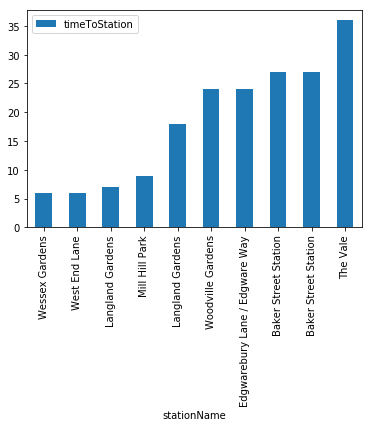

In [31]:
df.sort_values(by='timeToStation',ascending=True)[:10].plot.bar(x='stationName',y='timeToStation')

### Making a POST Request

Sending across some form-encoded data to the server — much like an HTML form. To do this, simply pass a dictionary to the data argument. Your dictionary of data will automatically be form-encoded when the request is made.

In [32]:
message

"ETA for the line 113 at Baker Street Station is 17:15 and it's heading towards Edgware"

In [33]:
# Step - 1 Sign up here: https://www.messagebird.com/en-gb/
# Step - 2 Get your access key here:  https://dashboard.messagebird.com/en/developers/access
# Read the documentation here https://developers.messagebird.com/docs/messaging

In [36]:
from keys import API_KEY, recipients, originator

In [37]:
payload= {
    'access_key':API_KEY,
    'originator':originator,
    'body':message,
    'recipients':recipients
}

In [38]:
MESSAGE_BIRD_URL = 'https://rest.messagebird.com/messages'

In order to carry out a POST request, using the module requests.

You can use the function `post()`, provided by the module requests.
The `post()` function takes two argument, which are:

- The URL for the request
- The data that the post request expects.

`post(url,data)`

In [39]:
response = requests.post(MESSAGE_BIRD_URL,data=payload)

In [40]:
#Status of the request
print("Is the request successful? ",response.ok)
print("The reason code is: ",response.reason) #. "Not Found" or "OK".
print('The status code of the response is: ', response.status_code)

Is the request successful?  True
The reason code is:  Created
The status code of the response is:  201
